# Santander Customer Transaction Prediction

By: Naeem Semerkant

## What are you trying to accomplish from this project?
We are using this data to apply data mining concepts we learned in class, as well as test our skill using RStudio. Especially classification and prediction, to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. 


## Introduction

For this project, our team will be doing a Kaggle challenge on Santander’s data set. Santander is a Spanish owned financial bank, and they need help with identifying customer behavior and spending habit. We will be using their provided data set to bring a solution to their problem. We believe this data set can be a great practice to apply what we have been learning in the class, such as classification and prediction methods.

## Project description/Abstract

We chose a dataset from Kaggle based on the challenge. Kaggle is hosting for Santander bank. On the overview page Kaggle has outlined this description:
At Santander, our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.
Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?
In this challenge, we will identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data.

## Data Set

Kaggle competition Santander Customer Transaction Prediction dataset containing 200 numeric feature variables, the binary “target” column, and a string “ID_code” column. The training set is 200000 records which may require some dimension reduction in order to be more computationally efficient and to classify more accurately.

## Literature Survey(existing work on this dataset)
According to the “LDA, QDA, LR” kernel in Kaggle the author shows the differences in the accuracy between LDA, QDA, and Logistic Regression and uses Cross-validation in order to choose training sets. He discovers that “LDA has the highest AUC for cross-validation among the three ML algorithms.” Later he goes on to using an ensemble of all three methods which just took an average of the 3 predictions. The author does not test the accuracy of the ensemble method.   


In [1]:
install.packages("MASS", repos = "http://cran.us.r-project.org")
install.packages("ggplot2", repos = "http://cran.us.r-project.org")
install.packages("data.table", repos = "http://cran.us.r-project.org")

package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\naeems\AppData\Local\Temp\RtmpyEL6VP\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\naeems\AppData\Local\Temp\RtmpyEL6VP\downloaded_packages
package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\naeems\AppData\Local\Temp\RtmpyEL6VP\downloaded_packages


In [2]:
library(MASS)
library(ggplot2)
library(data.table)

Warning message:
"package 'MASS' was built under R version 3.5.3"Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'data.table' was built under R version 3.5.3"

Let's check the dimension of train and test sets. Also check what are the variables that are there in train but not in test. Also let's have a look at the head of the data sets

In [3]:
train = fread("train.csv")
dim(train) ; head(train)

[1] 200000    202

ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


## Data Pre-processing

 It seems like the variables have no names as such and the only variable that is missing in the test set is the target column which we need to predict.
We need target column in both train set and test set so I will use train set only in this case.
Let's remove the ID column

In [4]:
train$ID_code = NULL

#str(train)

# datasets are too big. let's keep the first 21 variables
# train <- train[,1:22]
# str(train)
# test <- test[,1:21]
# str(test)
#summary(train)

Check if there are NA or blank values

In [5]:
NaValue = function (x) {sum(is.na(x)) }
apply(train, 2, NaValue)
# no NAs
BlankValue = function (x) {sum(x=="") }
apply(train, 2, BlankValue)
# no blanks
dataset <- train

target   var_0   var_1   var_2   var_3   var_4   var_5   var_6   var_7   var_8 
      0       0       0       0       0       0       0       0       0       0 
  var_9  var_10  var_11  var_12  var_13  var_14  var_15  var_16  var_17  var_18 
      0       0       0       0       0       0       0       0       0       0 
 var_19  var_20  var_21  var_22  var_23  var_24  var_25  var_26  var_27  var_28 
      0       0       0       0       0       0       0       0       0       0 
 var_29  var_30  var_31  var_32  var_33  var_34  var_35  var_36  var_37  var_38 
      0       0       0       0       0       0       0       0       0       0 
 var_39  var_40  var_41  var_42  var_43  var_44  var_45  var_46  var_47  var_48 
      0       0       0       0       0       0       0       0       0       0 
 var_49  var_50  var_51  var_52  var_53  var_54  var_55  var_56  var_57  var_58 
      0       0       0       0       0       0       0       0       0       0 
 var_59  var_60  var_61  var_62  var_63  var_64  var_65  var_66  var_67  var_68 
      0       0       0       0       0       0       0       0       0       0 
 var_69  var_70  var_71  var_72  var_73  var_74  var_75  var_76  var_77  var_78 
      0       0       0       0       0       0       0       0       0       0 
 var_79  var_80  var_81  var_82  var_83  var_84  var_85  var_86  var_87  var_88 
      0       0       0       0       0       0       0       0       0       0 
 var_89  var_90  var_91  var_92  var_93  var_94  var_95  var_96  var_97  var_98 
      0       0       0       0       0       0       0       0       0       0 
 var_99 var_100 var_101 var_102 var_103 var_104 var_105 var_106 var_107 var_108 
      0       0       0       0       0       0       0       0       0       0 
var_109 var_110 var_111 var_112 var_113 var_114 var_115 var_116 var_117 var_118 
      0       0       0       0       0       0       0       0       0       0 
var_119 var_120 var_121 var_122 var_123 var_124 var_125 var_126 var_127 var_128 
      0       0       0       0       0       0       0       0       0       0 
var_129 var_130 var_131 var_132 var_133 var_134 var_135 var_136 var_137 var_138 
      0       0       0       0       0       0       0       0       0       0 
var_139 var_140 var_141 var_142 var_143 var_144 var_145 var_146 var_147 var_148 
      0       0       0       0       0       0       0       0       0       0 
var_149 var_150 var_151 var_152 var_153 var_154 var_155 var_156 var_157 var_158 
      0       0       0       0       0       0       0       0       0       0 
var_159 var_160 var_161 var_162 var_163 var_164 var_165 var_166 var_167 var_168 
      0       0       0       0       0       0       0       0       0       0 
var_169 var_170 var_171 var_172 var_173 var_174 var_175 var_176 var_177 var_178 
      0       0       0       0       0       0       0       0       0       0 
var_179 var_180 var_181 var_182 var_183 var_184 var_185 var_186 var_187 var_188 
      0       0       0       0       0       0       0       0       0       0 
var_189 var_190 var_191 var_192 var_193 var_194 var_195 var_196 var_197 var_198 
      0       0       0       0       0       0       0       0       0       0 
var_199 
      0

target   var_0   var_1   var_2   var_3   var_4   var_5   var_6   var_7   var_8 
      0       0       0       0       0       0       0       0       0       0 
  var_9  var_10  var_11  var_12  var_13  var_14  var_15  var_16  var_17  var_18 
      0       0       0       0       0       0       0       0       0       0 
 var_19  var_20  var_21  var_22  var_23  var_24  var_25  var_26  var_27  var_28 
      0       0       0       0       0       0       0       0       0       0 
 var_29  var_30  var_31  var_32  var_33  var_34  var_35  var_36  var_37  var_38 
      0       0       0       0       0       0       0       0       0       0 
 var_39  var_40  var_41  var_42  var_43  var_44  var_45  var_46  var_47  var_48 
      0       0       0       0       0       0       0       0       0       0 
 var_49  var_50  var_51  var_52  var_53  var_54  var_55  var_56  var_57  var_58 
      0       0       0       0       0       0       0       0       0       0 
 var_59  var_60  var_61  var_62  var_63  var_64  var_65  var_66  var_67  var_68 
      0       0       0       0       0       0       0       0       0       0 
 var_69  var_70  var_71  var_72  var_73  var_74  var_75  var_76  var_77  var_78 
      0       0       0       0       0       0       0       0       0       0 
 var_79  var_80  var_81  var_82  var_83  var_84  var_85  var_86  var_87  var_88 
      0       0       0       0       0       0       0       0       0       0 
 var_89  var_90  var_91  var_92  var_93  var_94  var_95  var_96  var_97  var_98 
      0       0       0       0       0       0       0       0       0       0 
 var_99 var_100 var_101 var_102 var_103 var_104 var_105 var_106 var_107 var_108 
      0       0       0       0       0       0       0       0       0       0 
var_109 var_110 var_111 var_112 var_113 var_114 var_115 var_116 var_117 var_118 
      0       0       0       0       0       0       0       0       0       0 
var_119 var_120 var_121 var_122 var_123 var_124 var_125 var_126 var_127 var_128 
      0       0       0       0       0       0       0       0       0       0 
var_129 var_130 var_131 var_132 var_133 var_134 var_135 var_136 var_137 var_138 
      0       0       0       0       0       0       0       0       0       0 
var_139 var_140 var_141 var_142 var_143 var_144 var_145 var_146 var_147 var_148 
      0       0       0       0       0       0       0       0       0       0 
var_149 var_150 var_151 var_152 var_153 var_154 var_155 var_156 var_157 var_158 
      0       0       0       0       0       0       0       0       0       0 
var_159 var_160 var_161 var_162 var_163 var_164 var_165 var_166 var_167 var_168 
      0       0       0       0       0       0       0       0       0       0 
var_169 var_170 var_171 var_172 var_173 var_174 var_175 var_176 var_177 var_178 
      0       0       0       0       0       0       0       0       0       0 
var_179 var_180 var_181 var_182 var_183 var_184 var_185 var_186 var_187 var_188 
      0       0       0       0       0       0       0       0       0       0 
var_189 var_190 var_191 var_192 var_193 var_194 var_195 var_196 var_197 var_198 
      0       0       0       0       0       0       0       0       0       0 
var_199 
      0

dataset is ready for model. At a first step, I split into train set and test set. The data is split into 60-40 ratio.

In [32]:
set.seed(1)
row.number = sample(1:nrow(dataset), 0.6*nrow(dataset))
train = dataset[row.number,]
test = dataset[-row.number,]
dim(train)
dim(test)

[1] 120000    201

[1] 80000   201

## Logistic Regression
### Initial Model

In [7]:
attach(train)
model1 = glm(factor(target)~., data=train, family=binomial)
summary(model1)



Call:
glm(formula = factor(target) ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6247  -0.4011  -0.2321  -0.1233   3.6909  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.077e+01  7.987e+00   7.608 2.79e-14 ***
var_0        5.608e-02  3.609e-03  15.541  < 2e-16 ***
var_1        3.858e-02  2.745e-03  14.058  < 2e-16 ***
var_2        6.897e-02  4.163e-03  16.567  < 2e-16 ***
var_3        2.511e-02  5.472e-03   4.588 4.47e-06 ***
var_4        1.986e-02  6.882e-03   2.885 0.003911 ** 
var_5        1.402e-02  1.415e-03   9.908  < 2e-16 ***
var_6        2.580e-01  1.274e-02  20.245  < 2e-16 ***
var_7       -2.867e-04  3.271e-03  -0.088 0.930146    
var_8        1.948e-02  3.367e-03   5.786 7.22e-09 ***
var_9       -1.167e-01  8.973e-03 -13.005  < 2e-16 ***
var_10       3.819e-04  2.037e-03   0.187 0.851280    
var_11       1.184e-02  1.861e-03   6.360 2.02e-10 ***
var_12      -1.133e+00  5.7

Initial model shows most variables are statistically siginificant.

Predict for training data and find training accuracy

In [57]:
pred.prob = predict(model1, type="response")
pred.prob = ifelse(pred.prob > 0.5, 1, 0) # I use 0.5 as default threshold. should we change it to lower?

In [60]:
table(pred.prob, train$target)

# the accuracy of the model is 0.9145583=(106343+3336)/120000
auc=(106343+3336)/length(train$target)
auc
detach(train)

         
pred.prob      0      1
        0 106343   8794
        1   1527   3336

[1] 0.9139917

### Prediction on test Data

In [62]:
attach(test)
pred.prob = predict(model1, newdata= test, type="response")
pred.prob = ifelse(pred.prob > 0.5, 1, 0)
table(pred.prob, test$target)
auc = (71024+2204)/length(test$target)
auc
# the accuracy of the model is 0.9139125=(70943+2170)/80000

The following object is masked _by_ .GlobalEnv:

    target

The following objects are masked from test (pos = 3):

    target, var_0, var_1, var_10, var_100, var_101, var_102, var_103,
    var_104, var_105, var_106, var_107, var_108, var_109, var_11,
    var_110, var_111, var_112, var_113, var_114, var_115, var_116,
    var_117, var_118, var_119, var_12, var_120, var_121, var_122,
    var_123, var_124, var_125, var_126, var_127, var_128, var_129,
    var_13, var_130, var_131, var_132, var_133, var_134, var_135,
    var_136, var_137, var_138, var_139, var_14, var_140, var_141,
    var_142, var_143, var_144, var_145, var_146, var_147, var_148,
    var_149, var_15, var_150, var_151, var_152, var_153, var_154,
    var_155, var_156, var_157, var_158, var_159, var_16, var_160,
    var_161, var_162, var_163, var_164, var_165, var_166, var_167,
    var_168, var_169, var_17, var_170, var_171, var_172, var_173,
    var_174, var_175, var_176, var_177, var_178, var_179, var_18,
    var_180, var_1

         
pred.prob     0     1
        0 71024  5764
        1  1008  2204

[1] 0.91535

## LDA model

### Training model

In [11]:
# datasets are too big. let's keep the first 21 variables
#train <- train[,1:22]
#str(train)
#test <- test[,1:22]
# originally used this logic to create the model but later used 20 most important feature based on XGboost feature importance 
# report. created a better test auc score

Classes 'data.table' and 'data.frame':	120000 obs. of  22 variables:
 $ target: int  0 0 0 1 0 0 0 0 0 0 ...
 $ var_0 : num  9.58 15.19 10.2 14.55 13.19 ...
 $ var_1 : num  -1.14 -5.05 -3.94 -9.22 -3.45 ...
 $ var_2 : num  10.21 8.94 12.26 7.4 15.67 ...
 $ var_3 : num  5.5 6.24 6.01 8.18 6.68 ...
 $ var_4 : num  11.9 13 12.4 10.8 12.3 ...
 $ var_5 : num  -6.45 -9.09 -3.09 -7.9 -18.69 ...
 $ var_6 : num  3.96 4.5 3.5 4.94 4.43 ...
 $ var_7 : num  20.2 21.8 14.6 20.6 17.4 ...
 $ var_8 : num  -0.827 1.292 5.036 1.813 1.91 ...
 $ var_9 : num  6.08 6.86 7.93 7.7 7.93 ...
 $ var_10: num  6.55 -6 4.79 5.67 -3.66 ...
 $ var_11: num  0.927 -4.461 -7.505 -4.986 -10.953 ...
 $ var_12: num  13.9 13.9 13.6 13.7 13.8 ...
 $ var_13: num  -0.701 8.987 14.316 9.81 15.049 ...
 $ var_14: num  10.83 7.93 5.65 4.69 10.96 ...
 $ var_15: num  14.1 14.2 14.5 15.2 14.2 ...
 $ var_16: num  11.6 6 12.71 12.85 5.47 ...
 $ var_17: num  -12.73 -9.01 3.78 -3.34 -4.73 ...
 $ var_18: num  20.43 12.97 19.02 24.62 8.14 

In [34]:
attach(train)
lda.model = lda (factor(target)~var_81+var_139+var_12+var_26+var_53+var_110+var_146+var_6+var_174+var_80+var_76+var_22+var_109+var_99+var_21+var_166+var_165+var_148+var_2+var_190, data=train)

The following object is masked _by_ .GlobalEnv:

    target

The following objects are masked from train (pos = 3):

    target, var_0, var_1, var_10, var_100, var_101, var_102, var_103,
    var_104, var_105, var_106, var_107, var_108, var_109, var_11,
    var_110, var_111, var_112, var_113, var_114, var_115, var_116,
    var_117, var_118, var_119, var_12, var_120, var_121, var_122,
    var_123, var_124, var_125, var_126, var_127, var_128, var_129,
    var_13, var_130, var_131, var_132, var_133, var_134, var_135,
    var_136, var_137, var_138, var_139, var_14, var_140, var_141,
    var_142, var_143, var_144, var_145, var_146, var_147, var_148,
    var_149, var_15, var_150, var_151, var_152, var_153, var_154,
    var_155, var_156, var_157, var_158, var_159, var_16, var_160,
    var_161, var_162, var_163, var_164, var_165, var_166, var_167,
    var_168, var_169, var_17, var_170, var_171, var_172, var_173,
    var_174, var_175, var_176, var_177, var_178, var_179, var_18,
    var_180, var_

In [36]:
lda.model

Call:
lda(factor(target) ~ var_81 + var_139 + var_12 + var_26 + var_53 + 
    var_110 + var_146 + var_6 + var_174 + var_80 + var_76 + var_22 + 
    var_109 + var_99 + var_21 + var_166 + var_165 + var_148 + 
    var_2 + var_190, data = train)

Prior probabilities of groups:
        0         1 
0.8989167 0.1010833 

Group means:
    var_81  var_139   var_12    var_26   var_53  var_110   var_146   var_6
0 14.78015 7.955253 14.02804 -4.164868 5.992426 5.449911 10.387854 5.38722
1 14.19739 6.110879 13.98461 -2.881561 6.150679 6.259447  9.835165 5.58010
   var_174   var_80   var_76   var_22  var_109     var_99   var_21  var_166
0 20.35252 5.969459 6.206606 4.248820 18.52929 -0.7835346 17.43035 2.968774
1 18.91059 4.463865 4.627732 4.805257 17.79700 -0.4232565 15.88458 2.899544
   var_165  var_148    var_2  var_190
0 19.39892 3.994517 10.66794 3.143821
1 18.43751 3.955999 11.16889 3.999373

Coefficients of linear discriminants:
                LD1
var_81  -0.12046909
var_139 -0.03414612
var_

### Prediction on Training Data

In [37]:
predmodel.train.lda = predict(lda.model, data=train)
table(Predicted=predmodel.train.lda$class, target=train$target)

         target
Predicted      0      1
        0 107628  11634
        1    242    496

In [38]:
(107628+496)/120000

[1] 0.9010333

### Plot
The below plot shows how the response class has been classified by the LDA classifier. 
The X-axis shows the value of line defined by the co-efficient of linear discriminant for LDA model. 
The two groups are the groups for response classes.

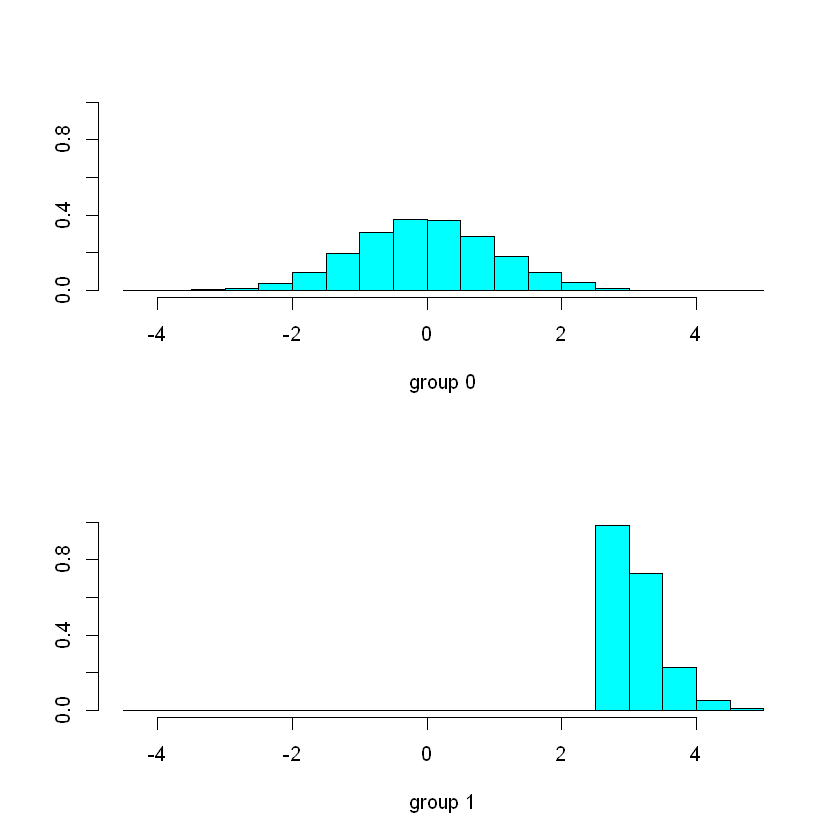

In [39]:
ldahist(predmodel.train.lda$x[,1], g= predmodel.train.lda$class)

From the plot, Group 0 has normal distribution. However, Group 1 does not have normal distribution. 
So, LDA is probably not ideal to predict because one of its preliminary is both groups should be normal distribution with same covariance.

### Prediction on Test Data

In [40]:
# check accuracy for test data
predmodel.test.lda = predict(lda.model, newdata=test)
table(Predicted=predmodel.test.lda$class, target=test$target)
# accuracy is 0.9140625 = (70891+2234)/80000 slightly lower than logistic regression

         target
Predicted     0     1
        0 71845  7665
        1   187   303

In [41]:
(71845+303)/80000

[1] 0.90185

### Plot for Test Prediction

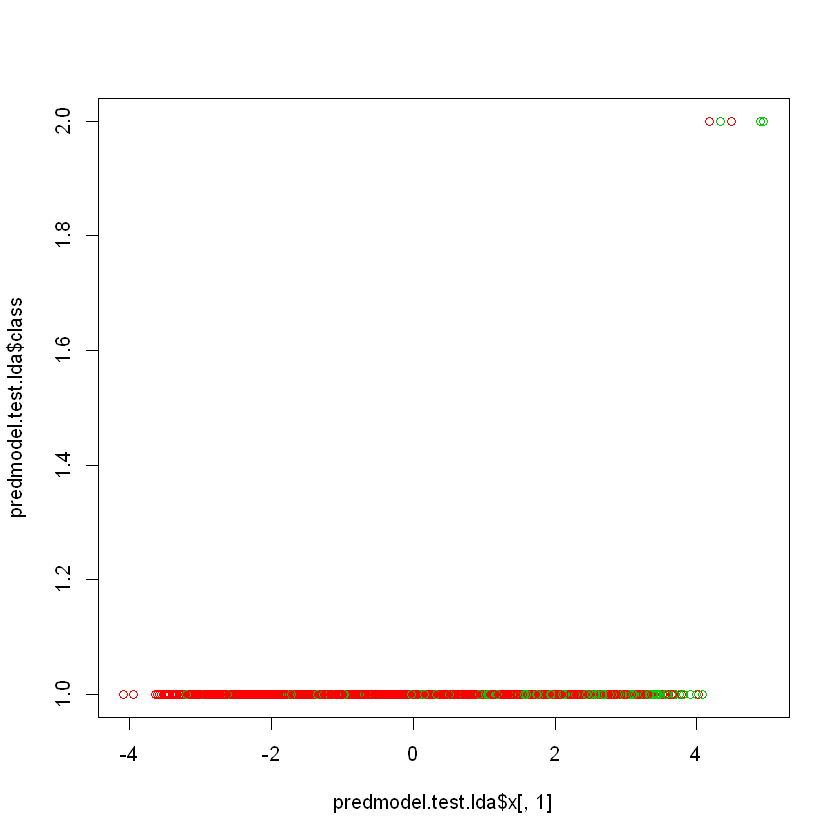

In [18]:
par(mfrow=c(1,1))
plot(predmodel.test.lda$x[,1], predmodel.test.lda$class, col=test$target+10)

## QDA model
### Training Model

In [43]:
#qda.model = qda(factor(target)~., data=train)
qda.model = qda(factor(target)~var_81+var_139+var_12+var_26+var_53+var_110+var_146+var_6+var_174+var_80+var_76+var_22+var_109+var_99+var_21+var_166+var_165+var_148+var_2+var_190, data=train)
qda.model

Call:
qda(factor(target) ~ var_81 + var_139 + var_12 + var_26 + var_53 + 
    var_110 + var_146 + var_6 + var_174 + var_80 + var_76 + var_22 + 
    var_109 + var_99 + var_21 + var_166 + var_165 + var_148 + 
    var_2 + var_190, data = train)

Prior probabilities of groups:
        0         1 
0.8989167 0.1010833 

Group means:
    var_81  var_139   var_12    var_26   var_53  var_110   var_146   var_6
0 14.78015 7.955253 14.02804 -4.164868 5.992426 5.449911 10.387854 5.38722
1 14.19739 6.110879 13.98461 -2.881561 6.150679 6.259447  9.835165 5.58010
   var_174   var_80   var_76   var_22  var_109     var_99   var_21  var_166
0 20.35252 5.969459 6.206606 4.248820 18.52929 -0.7835346 17.43035 2.968774
1 18.91059 4.463865 4.627732 4.805257 17.79700 -0.4232565 15.88458 2.899544
   var_165  var_148    var_2  var_190
0 19.39892 3.994517 10.66794 3.143821
1 18.43751 3.955999 11.16889 3.999373

### Prediction on Training Data

In [50]:
predmodel.train.qda = predict(qda.model, data=train)
table(Predicted=predmodel.train.qda$class, target=train$target)
# accuracy = 0.939325 = (106068+6651)/120000 much better than logistic regression and LDA

         target
Predicted      0      1
        0 107235  11011
        1    635   1119

In [51]:
(107235+1119)/120000

[1] 0.90295

### Predicting test results

In [52]:
attach(test)
predmodel.test.qda = predict(qda.model, newdata=test)
table(Predicted=predmodel.test.qda$class, target=test$target)
# accuracy = 0.9076625=(70390+2223)/80000 accuracy is lower in test set

The following object is masked _by_ .GlobalEnv:

    target

The following objects are masked from train (pos = 3):

    target, var_0, var_1, var_10, var_100, var_101, var_102, var_103,
    var_104, var_105, var_106, var_107, var_108, var_109, var_11,
    var_110, var_111, var_112, var_113, var_114, var_115, var_116,
    var_117, var_118, var_119, var_12, var_120, var_121, var_122,
    var_123, var_124, var_125, var_126, var_127, var_128, var_129,
    var_13, var_130, var_131, var_132, var_133, var_134, var_135,
    var_136, var_137, var_138, var_139, var_14, var_140, var_141,
    var_142, var_143, var_144, var_145, var_146, var_147, var_148,
    var_149, var_15, var_150, var_151, var_152, var_153, var_154,
    var_155, var_156, var_157, var_158, var_159, var_16, var_160,
    var_161, var_162, var_163, var_164, var_165, var_166, var_167,
    var_168, var_169, var_17, var_170, var_171, var_172, var_173,
    var_174, var_175, var_176, var_177, var_178, var_179, var_18,
    var_180, var_

         target
Predicted     0     1
        0 71574  7231
        1   458   737

In [53]:
(71574+737)/80000

[1] 0.9038875

### Plot

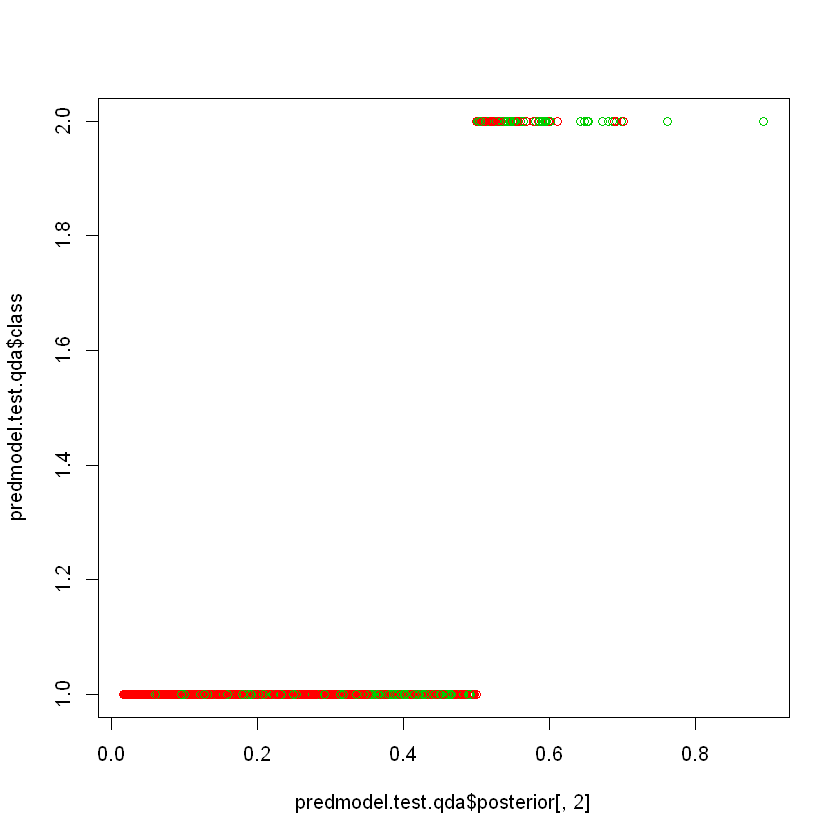

In [24]:
par(mfrow=c(1,1))
plot(predmodel.test.qda$posterior[,2], predmodel.test.qda$class, col=test$target+10)

QDA has more incorrect classifications.
It seems logitstic regression is the best classifier among the 3.

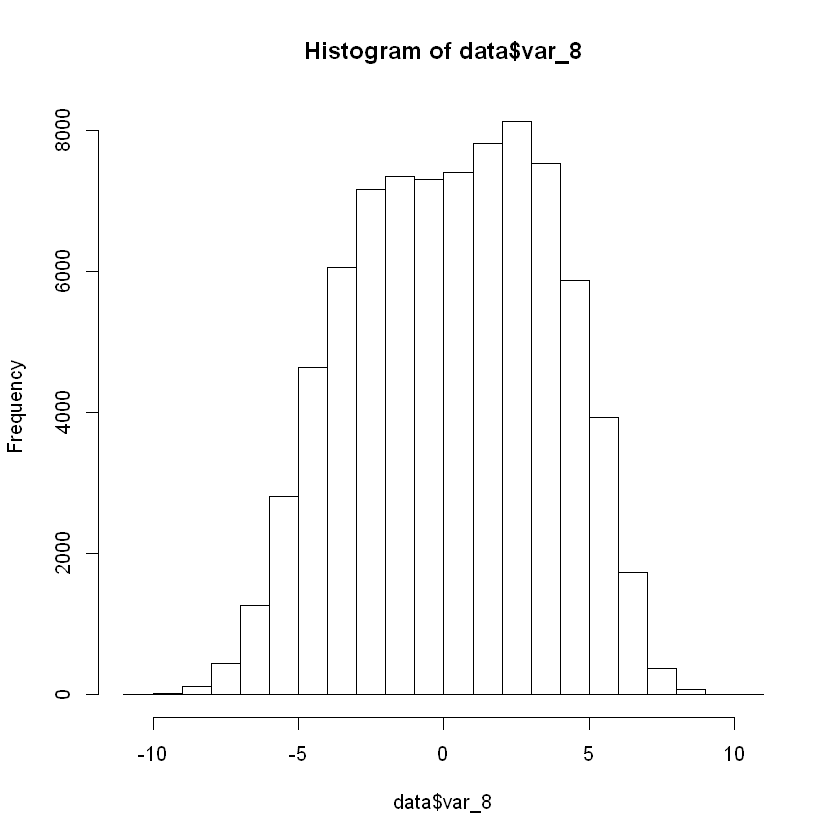

In [25]:
data <- as.data.frame(test[,1:10])

hist(data$var_8)

## XGBoost

XGBoost is short for e***X***treme ***G***radient ***Boost***ing package.

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for large structured data.
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

https://xgboost.readthedocs.io/en/latest/tutorials/model.html

In [26]:
#install.packages("caret", repos = "https://cran.us.r-project.org")
#install.packages("xgboost", repos = "https://cran.us.r-project.org")
install.packages("Ckmeans.1d.dp", repos = "https://cran.us.r-project.org")

package 'Ckmeans.1d.dp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\naeems\AppData\Local\Temp\RtmpyEL6VP\downloaded_packages


In [27]:
library(data.table)
require(Ckmeans.1d.dp)
library(xgboost)
library(Matrix)
library(magrittr)
train = fread("train.csv")

Loading required package: Ckmeans.1d.dp
Warning message:
"package 'Ckmeans.1d.dp' was built under R version 3.5.3"Warning message:
"package 'xgboost' was built under R version 3.5.3"

### Objective function

### $obj (\theta) = \sum_{i=1}^n L(y_i,y_i^t) +\sum_{i=1}^t \omega(\theta)$

### Loss Function
### $Logloss = -1/N \sum_{i=1}^N[y_i log p_i + (1-y_i)log(1-p_i)]$

In the above equation, N is the number of instances or samples. ‘yi’ would be the outcome of the i-th instance. Let us say, there are two results that an instance can assume, for example, 0 and 1. In the above equation, ‘yi’ would be 1 and hence, ‘1-yi’ is 0. ‘pi’ indicates the probability of the i-th instance assuming the value ‘yi’. In other words, log loss cumulates the probability of a sample assuming both states 0 and 1 over the total number of the instances. The simple condition behind the equation is: For the true output (yi) the probabilistic factor is -log(probability of true output) and for the other output is -log(1-probability of true output).

### Regularization

The regularization term controls the complexity of the model, which helps us to avoid overfitting.

### $\omega(\theta) = \gamma T +1/2 \lambda \sum_{j=1}^T w_j^2$

Here w is the vector of scores on leaves, T is the number of leaves, and \lambda is a shrinkage factor.

### Data Preprocessing

In [28]:
target = train$target
summary(target)
table(target)
# we have 10% of the labels as positive and rest are zeros. Now let's create models

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1005  0.0000  1.0000 

target
     0      1 
179902  20098 

Warning message in `[.data.table`(train, -row.number, ):
"Item 4 of i is -181639 but there are only 140000 rows. Ignoring this and 41942 more like it out of 140000."

### Training Model

In [63]:
xgboost_tree <- xgboost(data = as.matrix(train[, c(-1,-2)]), 
                         label = as.numeric(train$target),
                         max_depth = 2, 
                         eta = 0.1, 
                         objective = "binary:logistic", 
                         nrounds = 1000, 
                         verbose = TRUE)

[1]	train-error:0.101083 
[2]	train-error:0.101083 
[3]	train-error:0.101083 
[4]	train-error:0.101083 
[5]	train-error:0.101083 
[6]	train-error:0.101083 
[7]	train-error:0.101083 
[8]	train-error:0.101083 
[9]	train-error:0.101083 
[10]	train-error:0.101083 
[11]	train-error:0.101083 
[12]	train-error:0.101083 
[13]	train-error:0.101083 
[14]	train-error:0.101083 
[15]	train-error:0.101083 
[16]	train-error:0.101083 
[17]	train-error:0.101083 
[18]	train-error:0.101083 
[19]	train-error:0.101083 
[20]	train-error:0.101083 
[21]	train-error:0.101083 
[22]	train-error:0.101083 
[23]	train-error:0.101083 
[24]	train-error:0.101083 
[25]	train-error:0.101083 
[26]	train-error:0.101083 
[27]	train-error:0.101083 
[28]	train-error:0.101083 
[29]	train-error:0.101083 
[30]	train-error:0.101083 
[31]	train-error:0.101083 
[32]	train-error:0.101083 
[33]	train-error:0.101083 
[34]	train-error:0.101083 
[35]	train-error:0.101083 
[36]	train-error:0.101083 
[37]	train-error:0.101083 
[38]	train

### Feature Importance

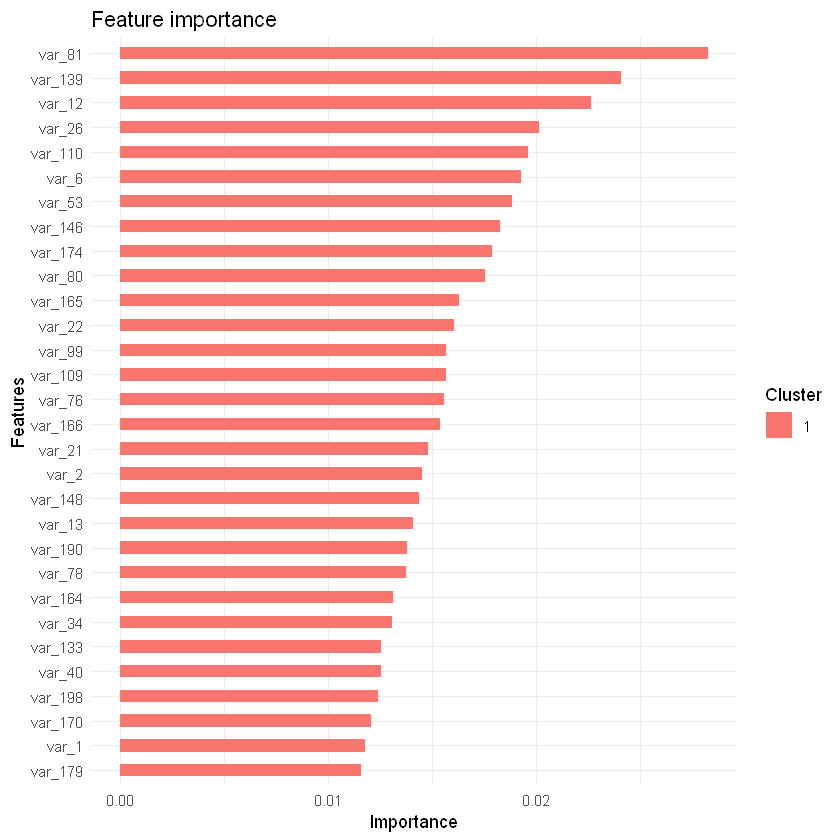

In [64]:
features <- colnames(train[, c(-1,-2)])
importance_matrix_tree <- xgb.importance(features, model = xgboost_tree)
xgb.ggplot.importance(importance_matrix_tree[1:30,]) +
ggplot2::theme_minimal()

### Prediction on Test Data

In [65]:
pred_tree <- predict(xgboost_tree, as.matrix(test[, 2:201]))
prediction_tree <- as.numeric(pred_tree > 0.5)
table(prediction_tree, test$target)

ERROR: Error in predict.xgb.Booster(xgboost_tree, as.matrix(test[, 2:201])): Feature names stored in `object` and `newdata` are different!


In [ ]:
(37517+1295)/length(prediction_tree) 

## Conclusion

Of the four methods we tested the XGBoost model was most efficient and accurate in predicting the dataset. Doing this research allowed me to learn a great deal about working with large data.

## References

Project Description: https://www.kaggle.com/c/santander-customer-transaction-prediction
<br/> Data: https://www.kaggle.com/c/santander-customer-transaction-prediction/data
<br/>Random Forest: https://www.kaggle.com/priteshshrivastava/random-forest-santander-classification-fast-ai<br/>
LDA, QDA, LR: https://www.kaggle.com/juminator/pca-lr-lda-qda-simple-ensemble
<br/>XGBoost Documentation: https://xgboost.readthedocs.io/en/latest/index.html